In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from calendar import month_name

In [108]:
data = pd.read_csv('../future_appts_raw.csv')
data

,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,service_mapping_priority,service_mapping_surgical,weekswaiting,no_show,did_not_attend_risk,did_not_attend_risk_group,prediction_type,case_control,use_case,appt_date
0,14943511,32,27.45,Asian,0,0,1,2,0,0,...,0,0,58.0,NaN,0.287193,High Risk,NaN,NaN,1,2024-05-08
1,15742730,42,27.45,Not Recorded/Stated,0,1,0,1,0,0,...,0,0,5.0,NaN,0.351414,High Risk,NaN,NaN,1,2024-08-02
2,16778162,22,21.70,White,0,0,0,2,0,0,...,0,1,67.0,NaN,0.575675,Very High Risk,NaN,NaN,1,2024-05-20
3,16994098,32,39.45,Not Recorded/Stated,0,1,0,2,0,0,...,0,0,63.0,NaN,0.150000,Moderate Risk,NaN,NaN,1,2024-07-31
4,17047096,62,27.45,Not Recorded/Stated,0,0,1,1,0,0,...,0,0,62.0,NaN,0.340443,High Risk,NaN,NaN,1,2024-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15810,20254158,32,21.70,White,0,0,1,3,0,0,...,0,0,4.0,NaN,0.365332,High Risk,NaN,NaN,1,2024-09-04
15811,20254160,82,27.45,Black,1,0,0,2,0,0,...,0,0,4.0,NaN,0.088879,Low Risk,NaN,NaN,1,2024-09-04
15812,20254163,82,27.45,Black,1,0,0,1,0,1,...,0,0,6.0,NaN,0.102636,Low Risk,NaN,NaN,1,2024-09-04
15813,20283951,32,27.45,Not Recorded/Stated,0,1,1,2,0,0,...,0,0,3.0,NaN,0.111294,Moderate Risk,NaN,NaN,1,2024-07-05


### Check missing data

In [109]:
# Check for missing values
data.isnull().sum()

appointment_id                              0
age_deid                                    0
bmi_deid                                    0
ethnicity                                   0
ethnic_category_black                       0
ethnic_category_unknown                     0
gender_male                                 0
imd19_quintile                              0
main_spoken_language_other                  0
current_smoker                              0
substance_misuse                            0
smoking_unknown                             0
tfc_name                                    0
patient_on_multiple_pathways                0
appt_month                                  0
appt_hour                                   0
appt_duration                               0
hospital_service_display                    3
service_mapping                             0
reason_display                              0
appointment_type                            0
new_appt_flag                     

### Categorical data

<Axes: xlabel='age_deid'>

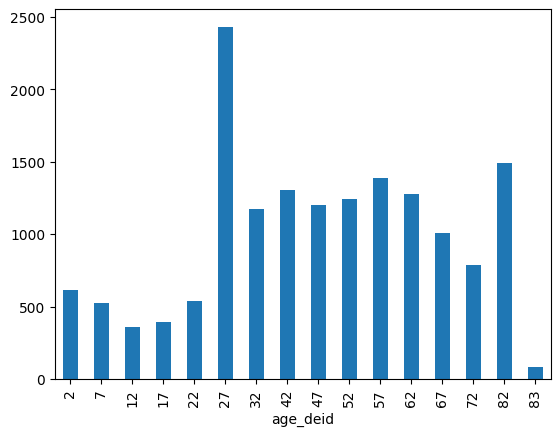

In [110]:
# Plot bar chart for age
data["age_deid"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='bmi_deid'>

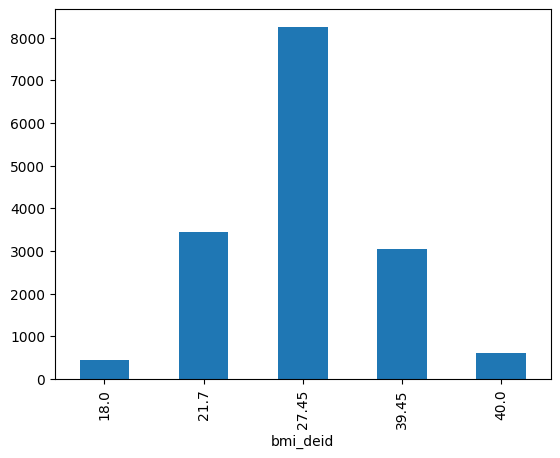

In [111]:
# Plot bar chart for BMI
data["bmi_deid"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='ethnic_category_unknown'>

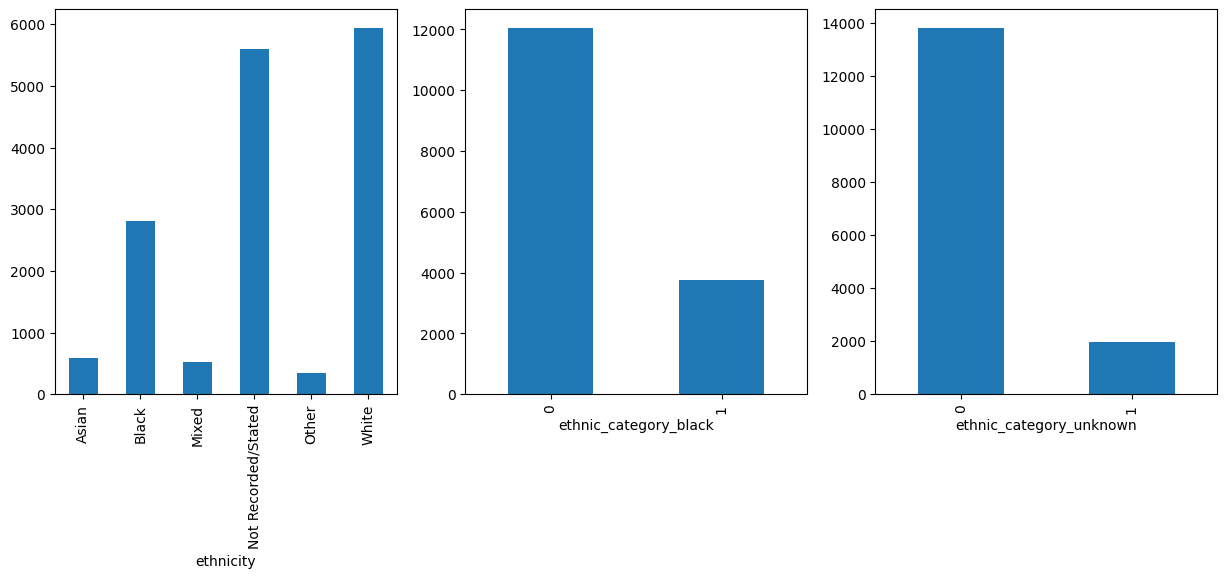

In [112]:
# Plot bar charts for ethnicity, ethnic_category_black, and ethnic_category_unknown
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["ethnicity"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["ethnic_category_black"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["ethnic_category_unknown"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

<Axes: xlabel='gender_male'>

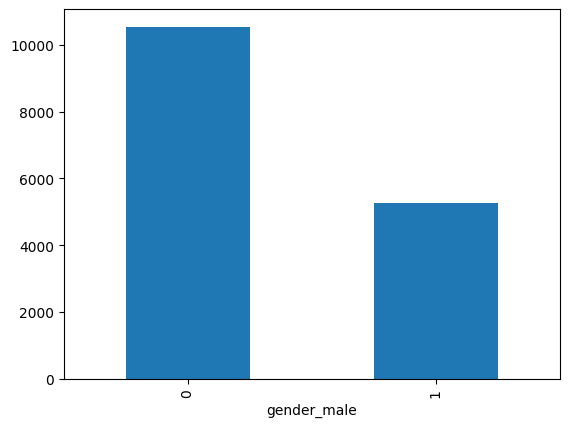

In [113]:
# Plot bar chart for gender_male
data["gender_male"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='imd19_quintile'>

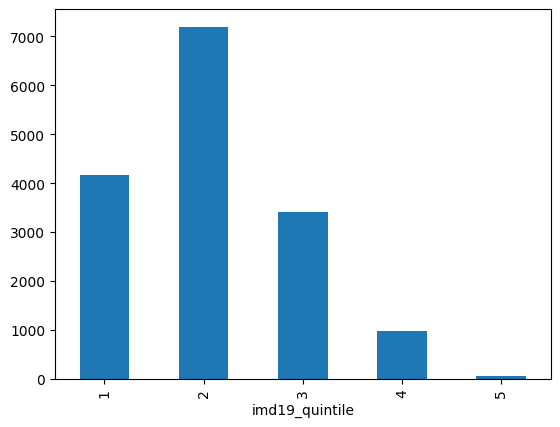

In [114]:
# Plot bar chart for imd19_quintile
data["imd19_quintile"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='main_spoken_language_other'>

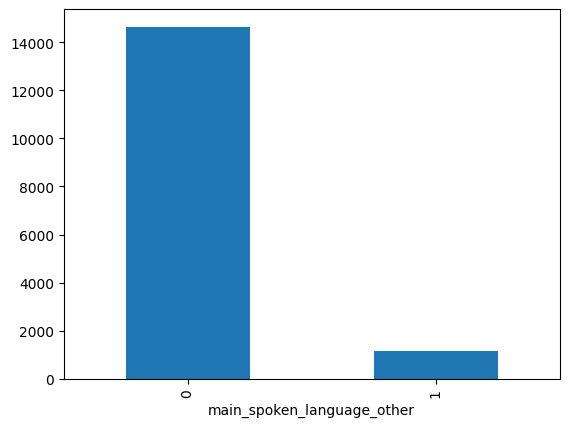

In [115]:
# Plot bar chart for main_spoken_language_other
data["main_spoken_language_other"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='smoking_unknown'>

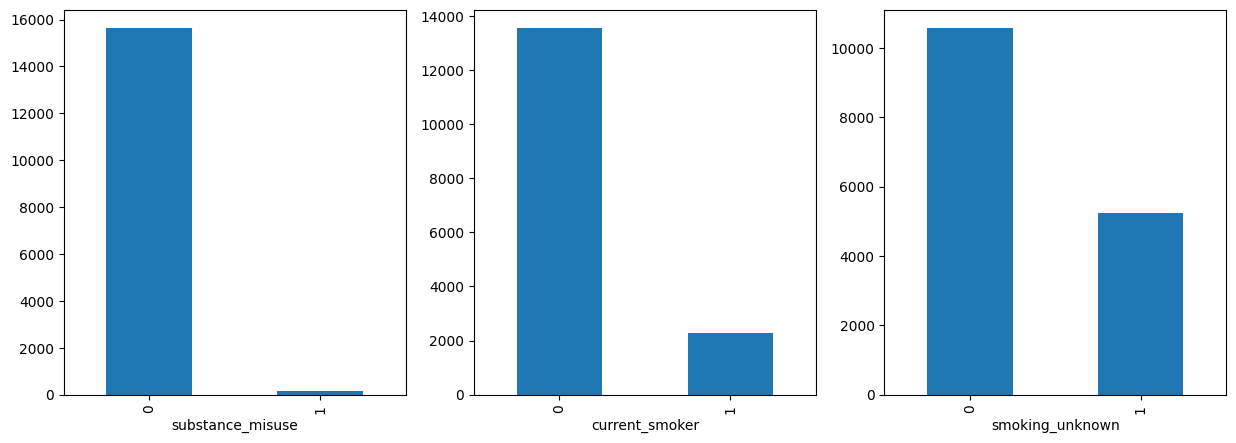

In [116]:
# Plot bar charts for substance_misuse, current_smoker and smoking_unknown
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["substance_misuse"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["current_smoker"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["smoking_unknown"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

<Axes: xlabel='tfc_name'>

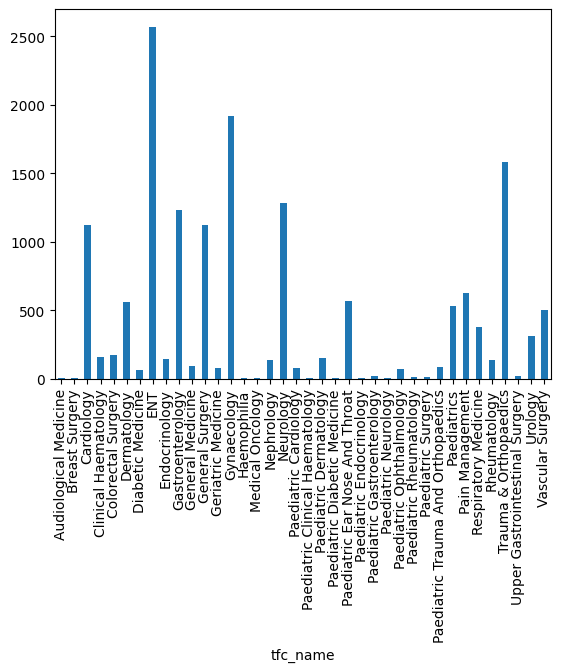

In [117]:
# Plot bar chart for tfc_name
data["tfc_name"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='patient_on_multiple_pathways'>

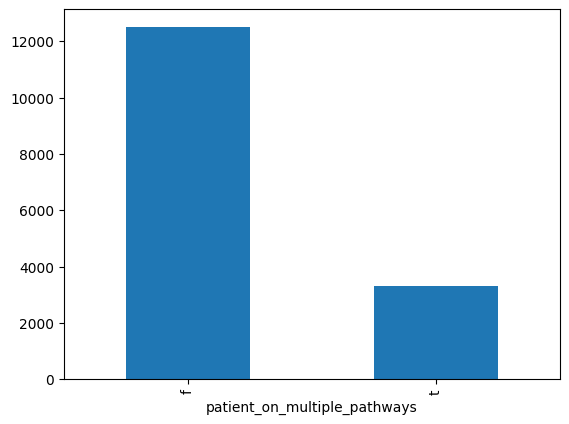

In [118]:
# Plot bar chart for patient_on_multiple_pathways
data["patient_on_multiple_pathways"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='appt_month'>

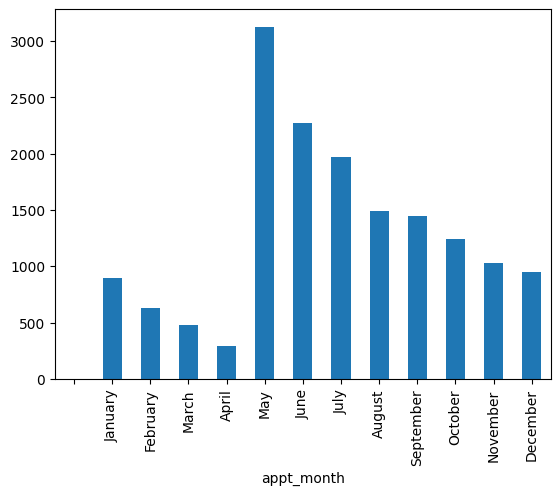

In [119]:
# Plot bar chart for appt_month
month_lookup = list(month_name)
data["appt_month"] = pd.Categorical(data["appt_month"], categories=month_lookup, ordered=True)
data["appt_month"].value_counts().sort_index().plot(kind='bar')

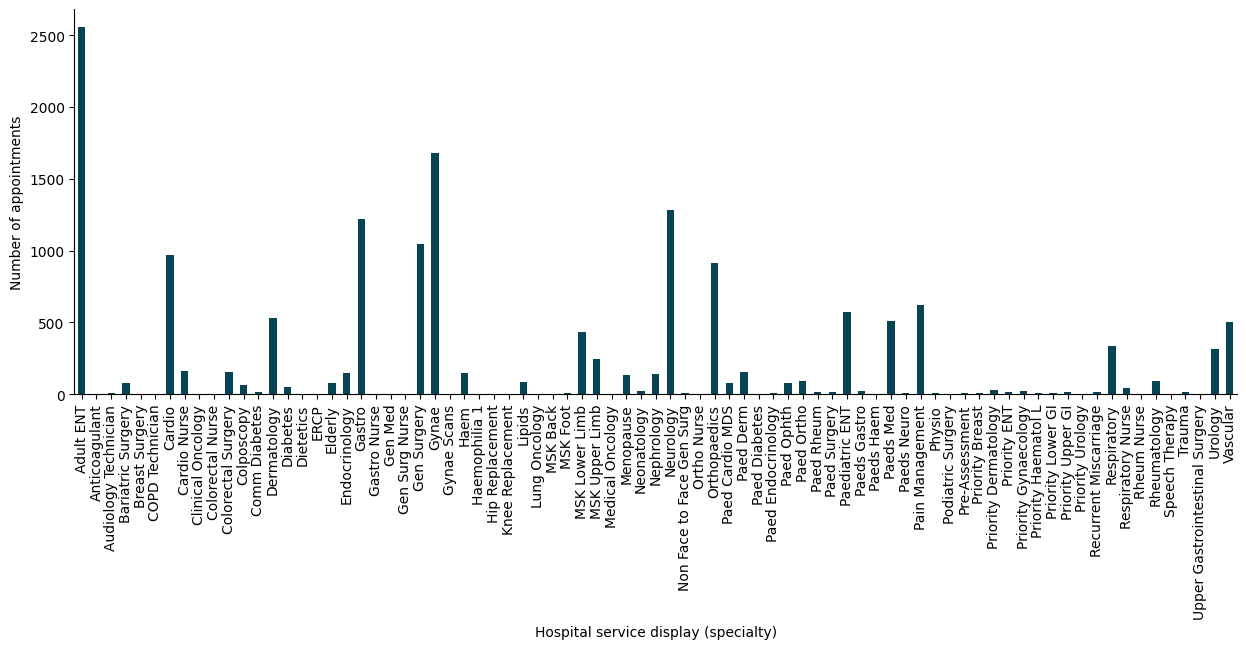

In [120]:
# Plot bar charts for hospital_service_display
plt.figure(figsize=(15, 5))
ax = data["hospital_service_display"].value_counts().sort_index().plot(kind='bar', color="#084454")
ax.set_xlabel("Hospital service display (specialty)")
ax.set_ylabel("Number of appointments")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


<Axes: xlabel='service_mapping'>

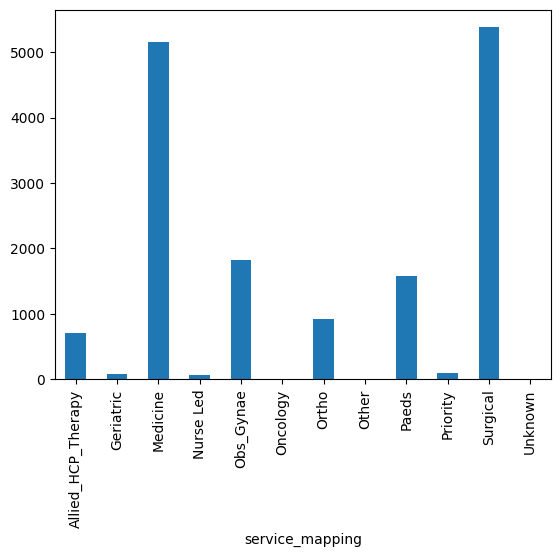

In [121]:
# Plot bar charts for service_mapping
data["service_mapping"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='reason_display'>

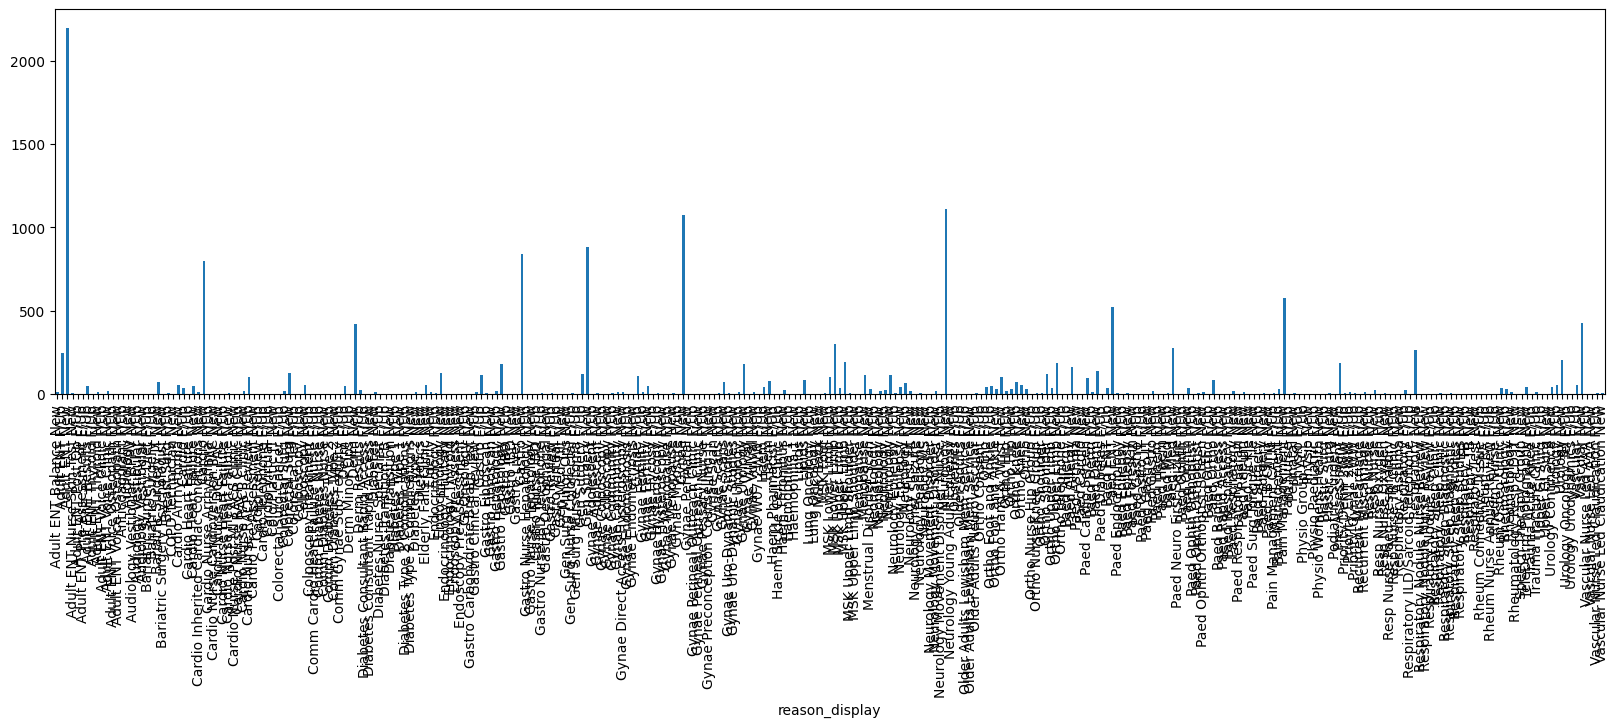

In [122]:
# Plot bar charts for reason_display
plt.figure(figsize=(20, 5))
data["reason_display"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='appointment_type'>

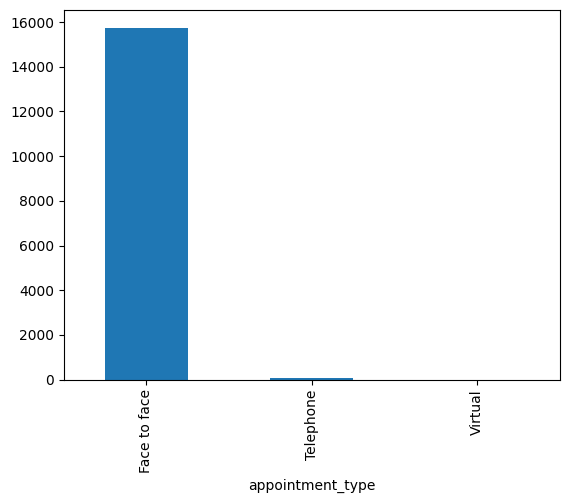

In [123]:
# Plot bar charts for appointment_type
data["appointment_type"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='new_appt_flag'>

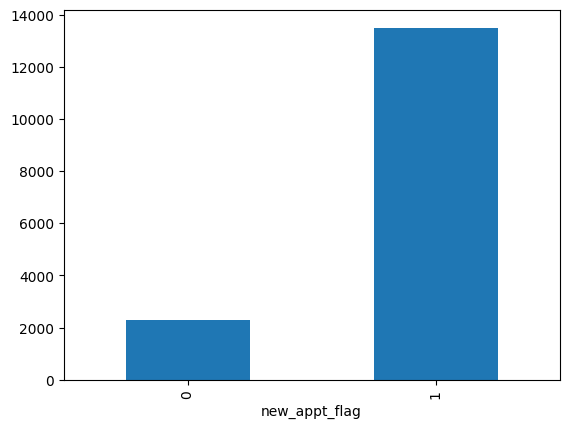

In [124]:
# Plot bar charts for new_appt_flag
data["new_appt_flag"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='appt_hour_2pm_to_3pm'>

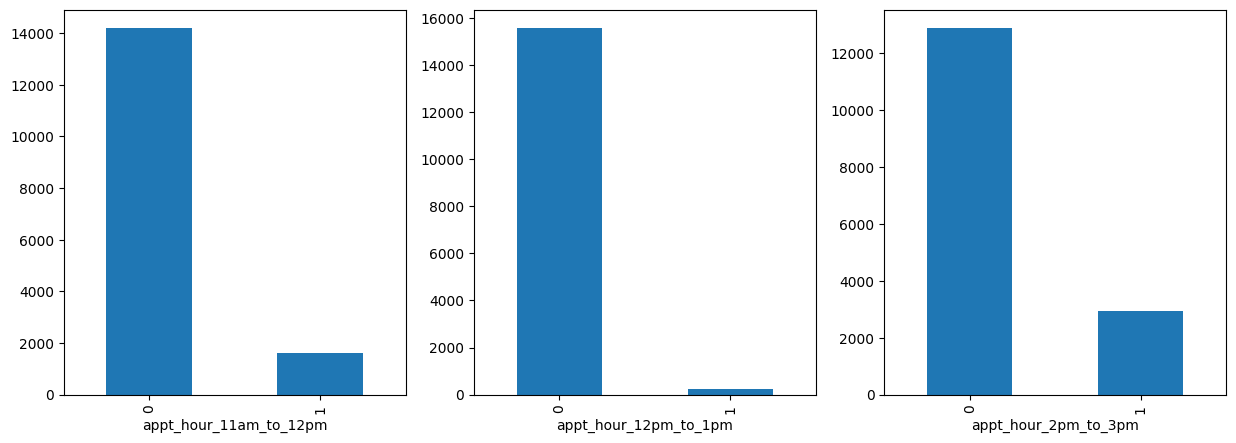

In [125]:
# Plot bar charts for apointment hours
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["appt_hour_11am_to_12pm"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["appt_hour_12pm_to_1pm"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["appt_hour_2pm_to_3pm"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

<Axes: xlabel='appt_season_winter'>

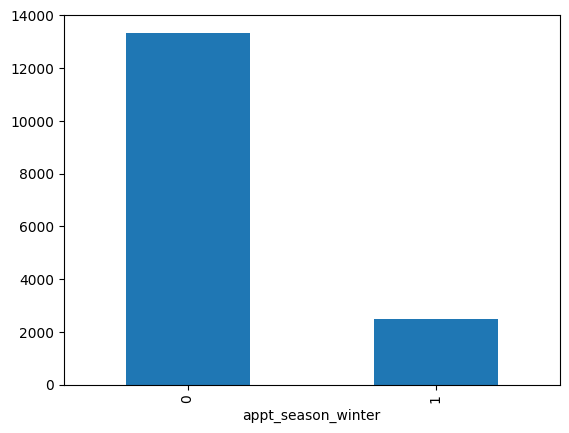

In [126]:
# Plot bar charts for appt_season_winter
data["appt_season_winter"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='emergency_enc_last_12m_three_or_more'>

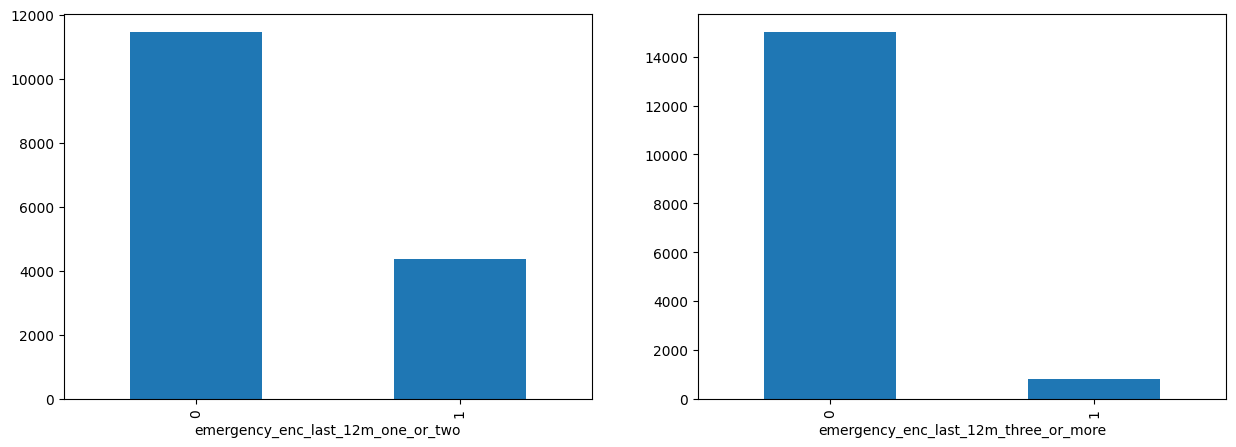

In [127]:
# Plot bar charts for emergency_enc_last_12m_one_or_two and	emergency_enc_last_12m_three_or_more
fig, axes = plt.subplots(1,2, figsize=(15, 5))
data["emergency_enc_last_12m_one_or_two"].value_counts().sort_index().plot(kind='bar', ax = axes[0])
data["emergency_enc_last_12m_three_or_more"].value_counts().sort_index().plot(kind='bar', ax = axes[1])

<Axes: xlabel='num_reschedules_two_or_more'>

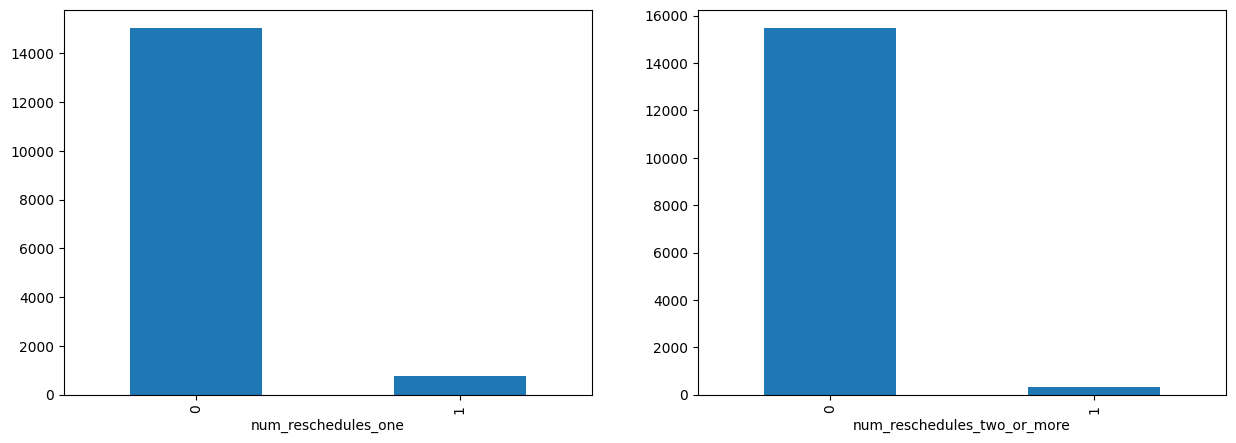

In [128]:
# Plot bar charts of # of reschedules
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
data["num_reschedules_one"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["num_reschedules_two_or_more"].value_counts().sort_index().plot(kind='bar', ax=axes[1])

<Axes: xlabel='other_vulnerability'>

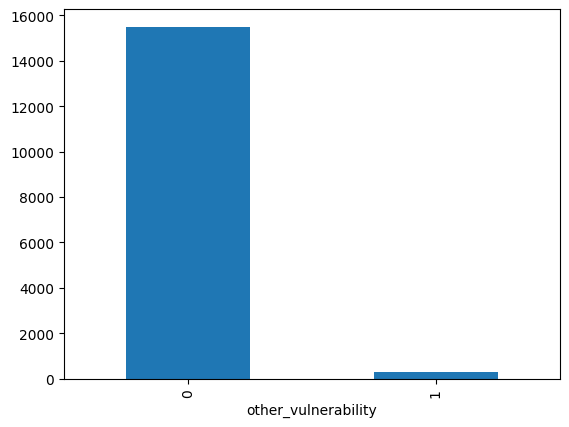

In [129]:
# Plot bar charts for other_vulnerability
data["other_vulnerability"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='past_no_show_count_three_or_more'>

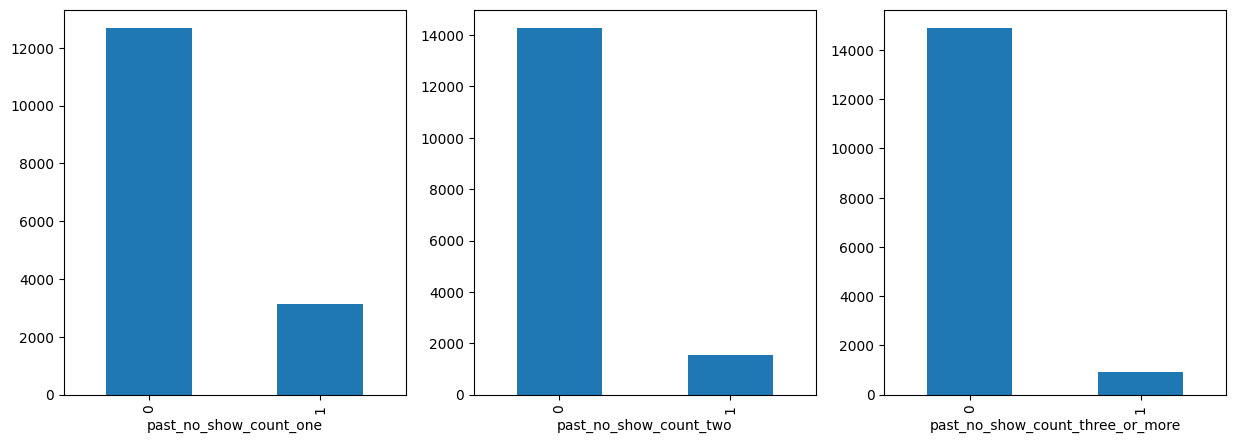

In [130]:
# Plot bar charts for past no shows
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["past_no_show_count_one"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["past_no_show_count_two"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["past_no_show_count_three_or_more"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

<Axes: xlabel='phone_number'>

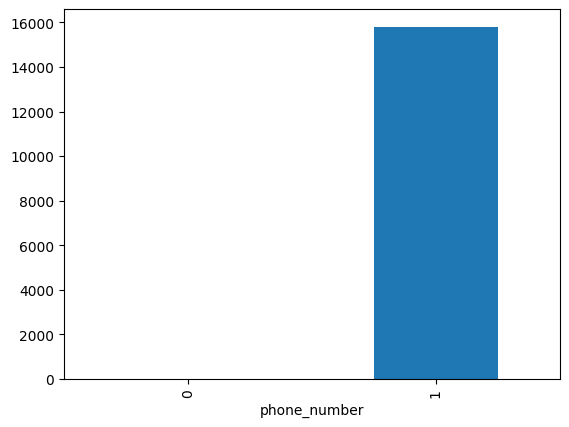

In [131]:
# Plot bar chart for phone_number
data["phone_number"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='physically_inactive'>

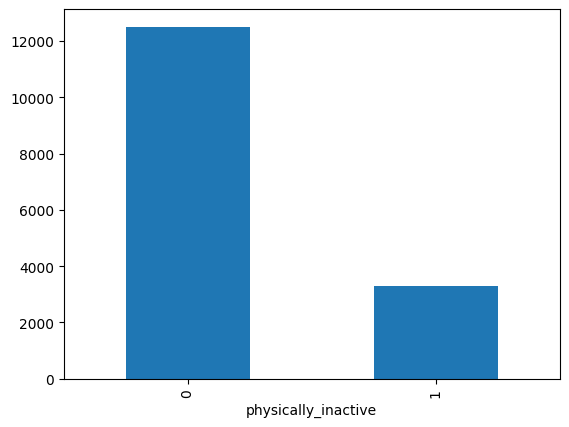

In [132]:
# Plot bar chart for physically_inactive
data["physically_inactive"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='safeguarding'>

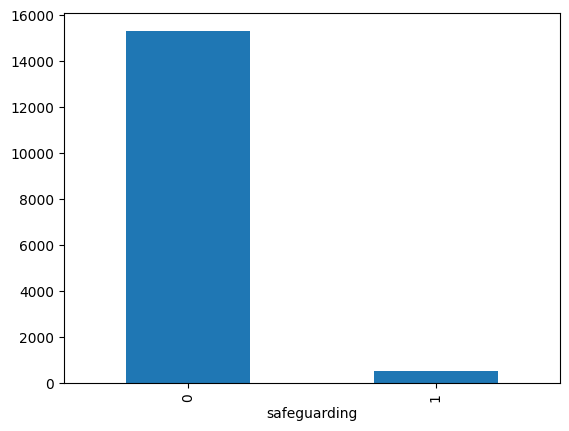

In [133]:
# Plot bar chart for safeguarding
data["safeguarding"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='service_mapping_priority'>

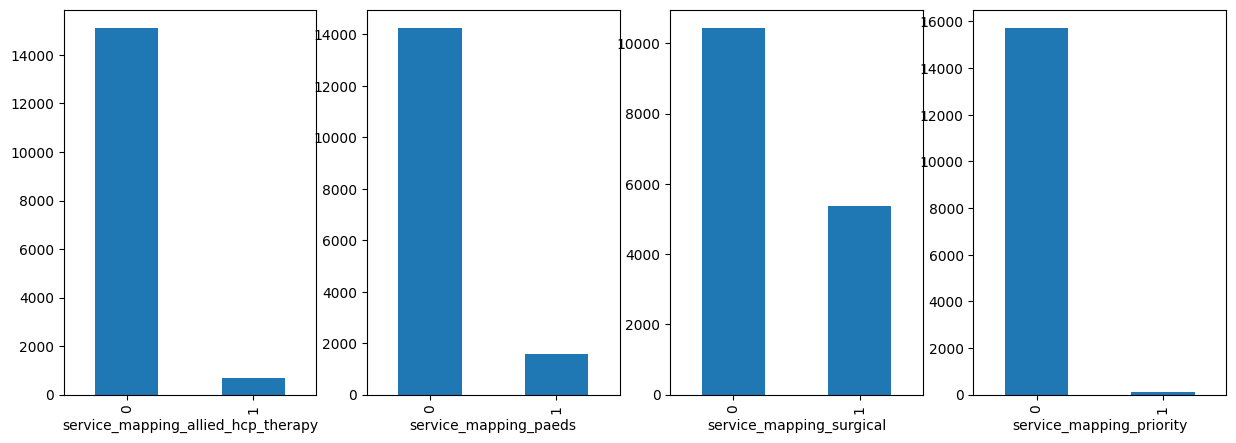

In [134]:
# Plot charts for service mappings
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

data["service_mapping_allied_hcp_therapy"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["service_mapping_paeds"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["service_mapping_surgical"].value_counts().sort_index().plot(kind='bar', ax=axes[2])
data["service_mapping_priority"].value_counts().sort_index().plot(kind='bar', ax=axes[3])

did_not_attend_risk_group
High Risk         0.440152
Moderate Risk     0.300474
Low Risk          0.194246
Very High Risk    0.065128
Name: proportion, dtype: float64


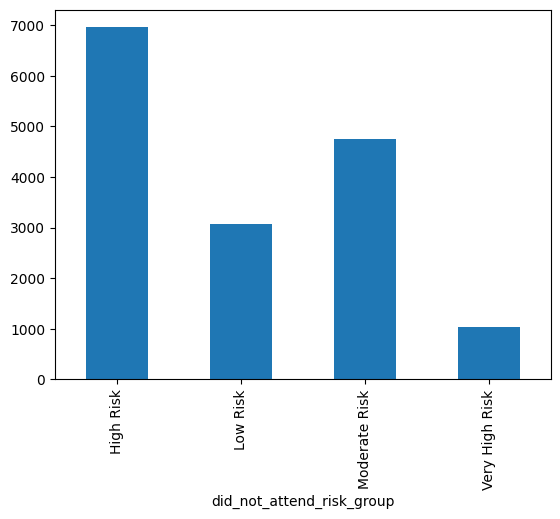

In [135]:
# Plot bar chart for did_not_attend_risk_group
data["did_not_attend_risk_group"].value_counts().sort_index().plot(kind='bar')

print(data["did_not_attend_risk_group"].value_counts(normalize=True))

### Continuous variables

count                            15815
mean     2024-09-11 08:00:34.600063232
min                2024-05-01 00:00:00
25%                2024-06-13 00:00:00
50%                2024-08-19 00:00:00
75%                2024-11-21 00:00:00
max                2026-01-12 00:00:00
Name: appt_date, dtype: object
2024-08-19 00:00:00


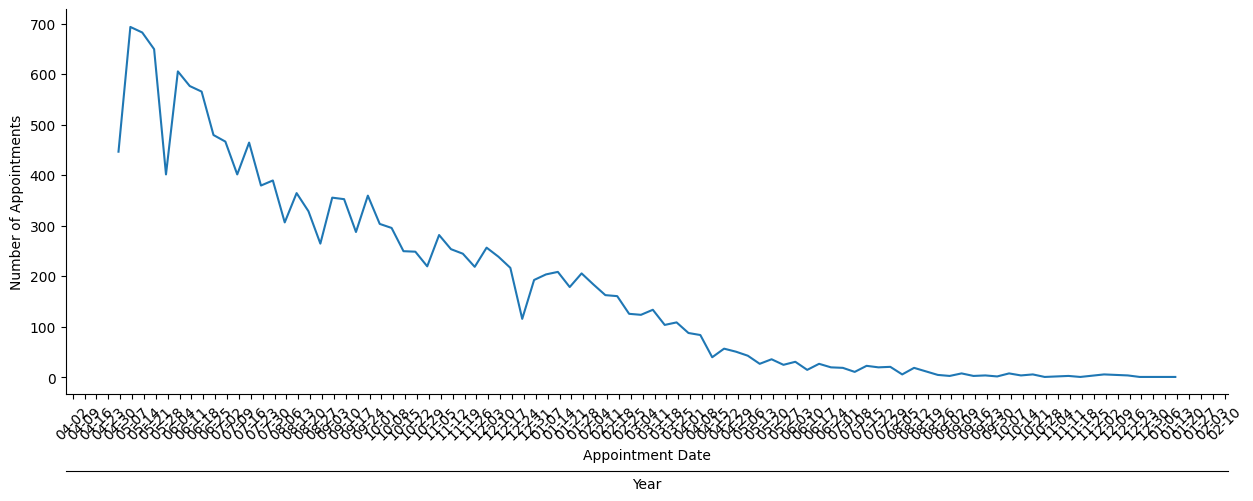

In [136]:
# Plot line plot for weekly appointments

# Aggregate the data by week
data["appt_date"] = pd.to_datetime(data["appt_date"])
weekly_appointments = data["appt_date"].dt.to_period('W').value_counts().sort_index()

# Convert the index to datetime for plotting
weekly_appointments.index = weekly_appointments.index.to_timestamp()

# Plot the line plot for weekly appointments
plt.figure(figsize=(15, 5))
plt.plot(weekly_appointments.index, weekly_appointments.values)

# Set x-axis ticks to weekly intervals
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set major ticks to weekly intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Format the ticks as dates
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a second x-axis with years
secax = ax.secondary_xaxis(-0.2)
secax.set_xticks([mdates.date2num(pd.Timestamp('2023-12-01')), mdates.date2num(pd.Timestamp('2024-01-01'))])
secax.set_xticklabels(['2023', '2024'])
secax.xaxis.set_tick_params(length=0)  # Hide the tick marks
secax.set_xlabel('Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')
#plt.title('Distribution of Historic Appointments by Week')

# Summary statistics for the appointment dates
print(data["appt_date"].describe())
print(data["appt_date"].median())

count    15815.000000
mean        21.522226
std         14.515927
min          3.000000
25%         10.000000
50%         18.000000
75%         31.000000
max         96.000000
Name: weekswaiting, dtype: float64


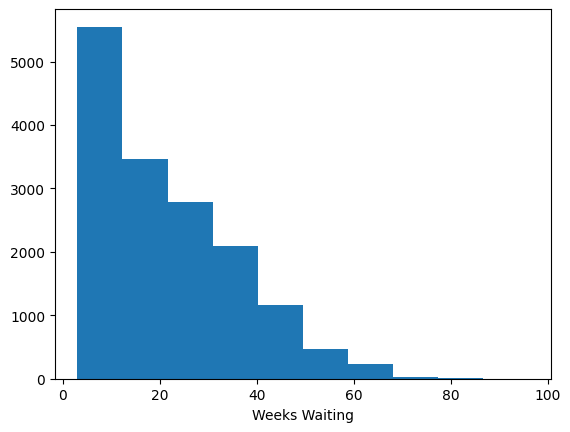

In [151]:
# Plot histogram for weekswaiting
plt.hist(data["weekswaiting"])
plt.xlabel("Weeks Waiting")
print(data["weekswaiting"].describe())

Text(0.5, 0, 'appt_duration')

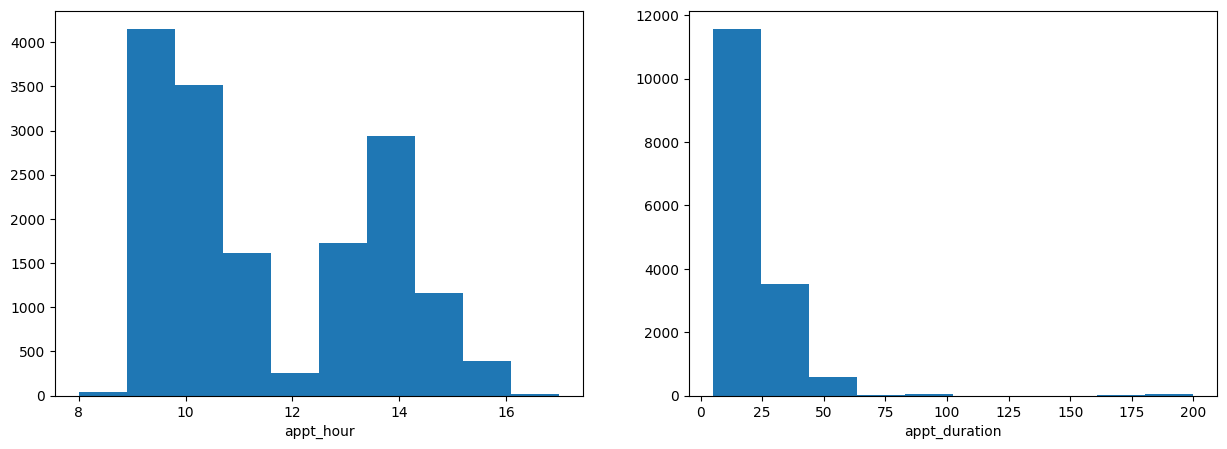

In [138]:
# Plot histograms for appt_hour and appt_duration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data["appt_hour"])
axes[0].set_xlabel("appt_hour")
axes[1].hist(data["appt_duration"])
axes[1].set_xlabel("appt_duration")

21.220044261776795
20.0
appt_duration
15.0     0.386721
20.0     0.245337
30.0     0.168195
10.0     0.097629
25.0     0.050269
45.0     0.035599
90.0     0.004110
200.0    0.003667
40.0     0.003414
5.0      0.001897
180.0    0.001581
60.0     0.001391
75.0     0.000190
Name: proportion, dtype: float64


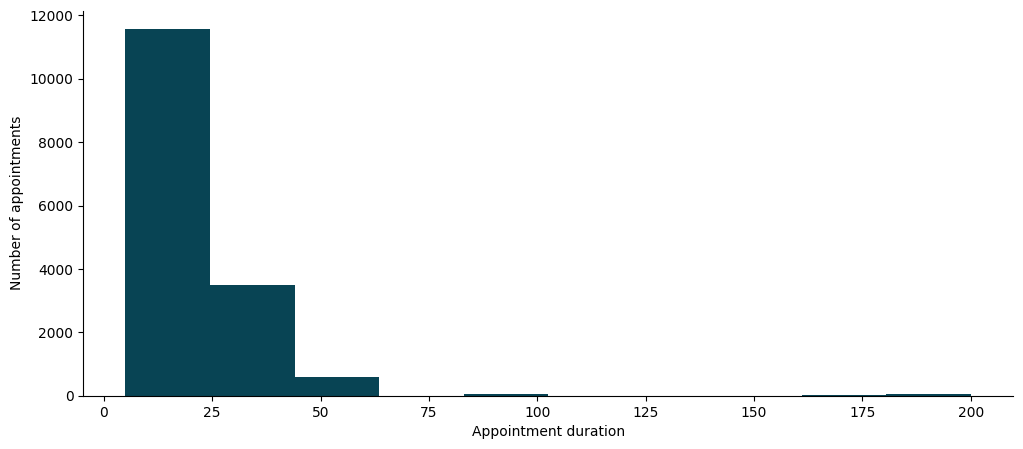

In [139]:
# A standalone plot for appt_duration
plt.figure(figsize=(12, 5))
plt.hist(data["appt_duration"], color="#084454")
plt.xlabel("Appointment duration")
plt.ylabel("Number of appointments")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(data["appt_duration"].mean())
print(data["appt_duration"].median())
print(data["appt_duration"].value_counts(normalize=True))

Text(0.5, 0, 'lead_time')

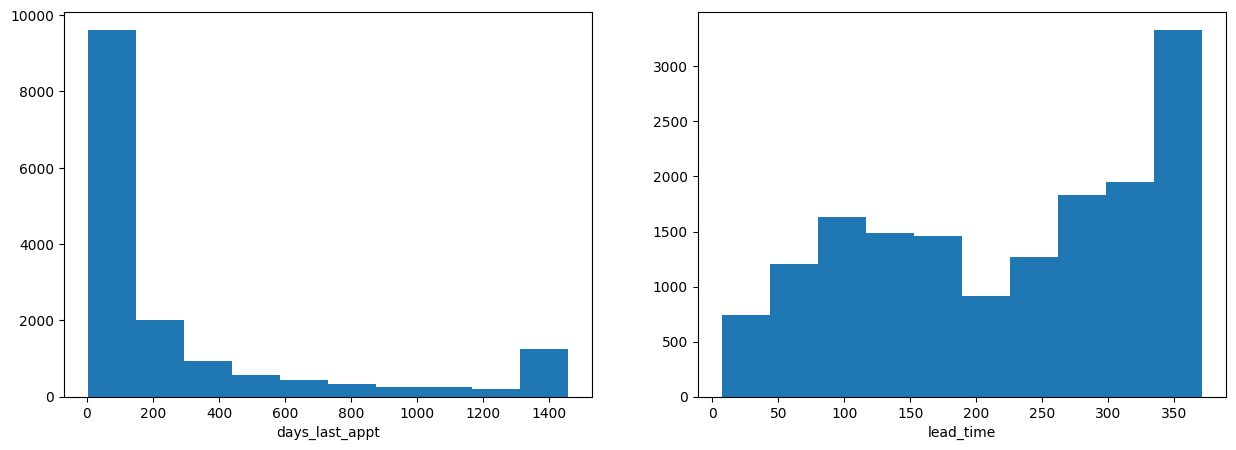

In [140]:
# Plot histograms to wait time
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data["days_last_appt"])
axes[0].set_xlabel("days_last_appt")
axes[1].hist(data["lead_time"])
axes[1].set_xlabel("lead_time")

Text(0.5, 0, 'past_no_show_rate')

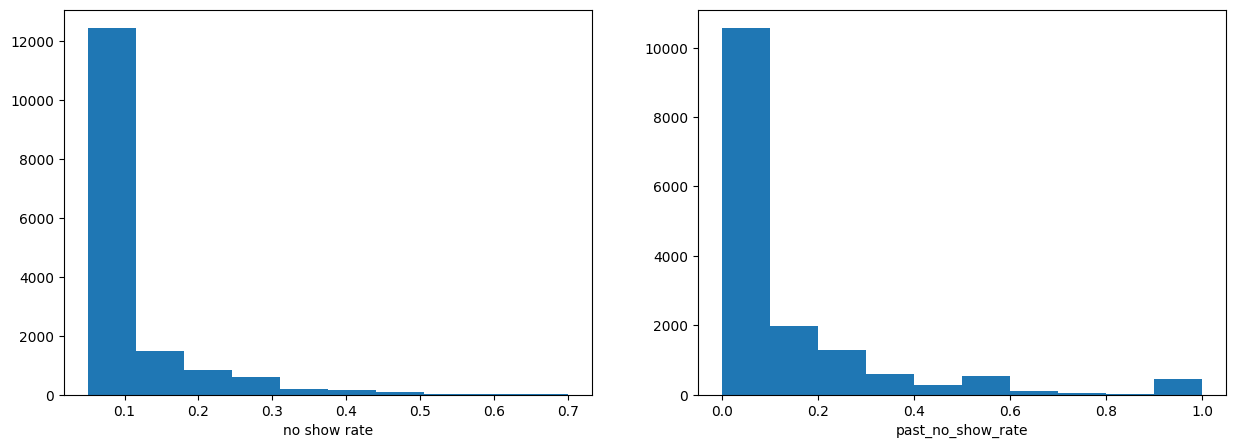

In [141]:
# Plot histograms to no show rate
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data["ns_rate_seq"])
axes[0].set_xlabel("no show rate")
axes[1].hist(data["past_no_show_rate"])
axes[1].set_xlabel("past_no_show_rate")

Text(0.5, 0, 'op_appts_last_12m')

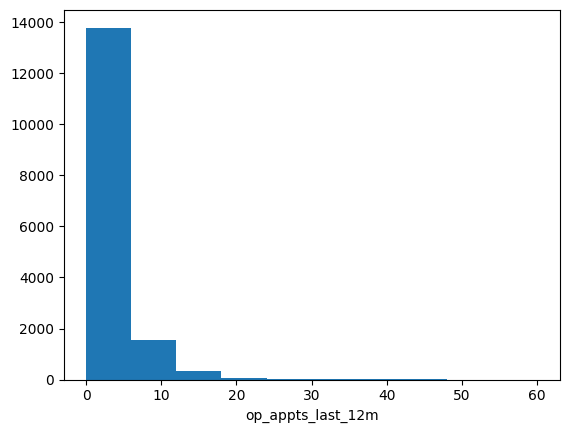

In [142]:
# Plot histogram for op_appts_last_12m
plt.hist(data["op_appts_last_12m"])
plt.xlabel("op_appts_last_12m")

Text(0.5, 0, 'osrm_drive_time')

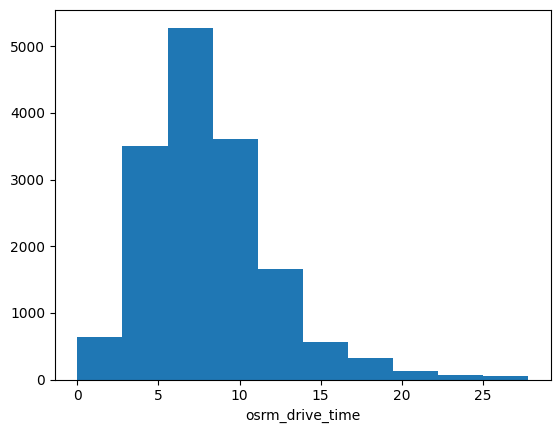

In [143]:
# Plot histogram for osrm_drive_time
plt.hist(data["osrm_drive_time"])
plt.xlabel("osrm_drive_time")

Text(0.5, 0, 'ltc_count')

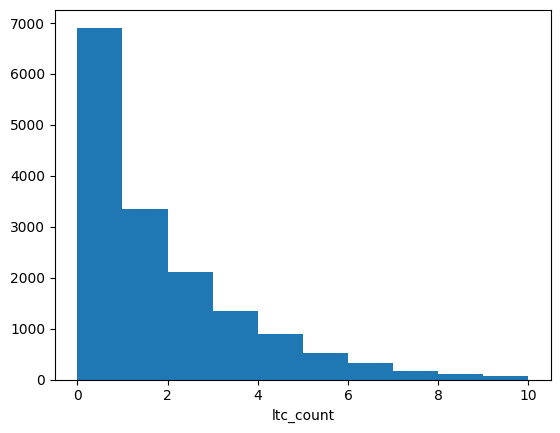

In [144]:
# Plot histogram for ltc_count
plt.hist(data["ltc_count"])
plt.xlabel("ltc_count")

Text(0.5, 0, 'did_not_attend_risk')

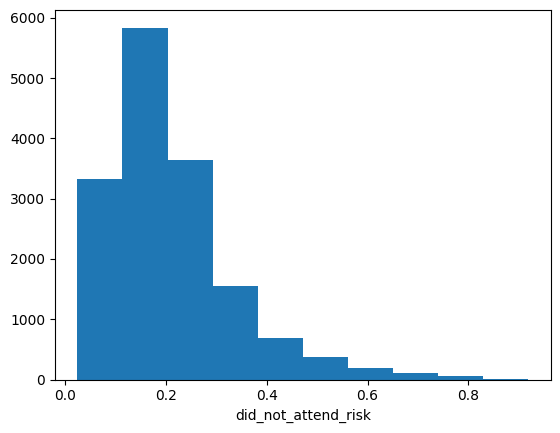

In [145]:
# Plot histogram for did_not_attend_risk
plt.hist(data["did_not_attend_risk"])
plt.xlabel("did_not_attend_risk")

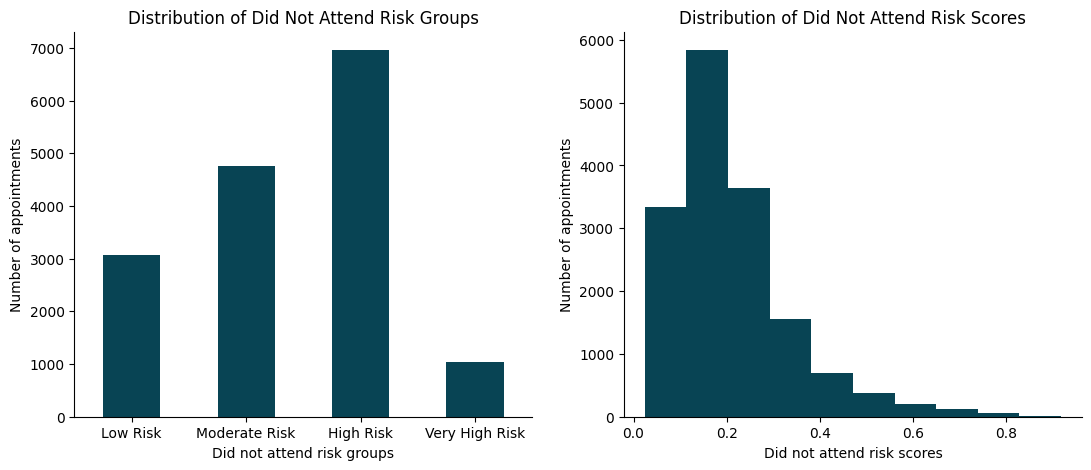

In [150]:
# Combine both DNA risks (groups & scores) into 1 plot

# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot the bar chart in the first subplot
data["did_not_attend_risk_group"].value_counts().reindex(["Low Risk", "Moderate Risk", "High Risk", "Very High Risk"]).plot(kind='bar', ax=ax1, color="#084454")
ax1.set_xlabel('Did not attend risk groups')
ax1.set_ylabel('Number of appointments')
ax1.set_title('Distribution of Did Not Attend Risk Groups')
# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', labelrotation=360)

# Remove top and right borders (spines) for the bar chart
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plot histogram for did_not_attend_risk
ax2.hist(data["did_not_attend_risk"], color="#084454")
ax2.set_xlabel("Did not attend risk scores")
ax2.set_ylabel("Number of appointments")
ax2.set_title("Distribution of Did Not Attend Risk Scores")

# Remove top and right borders (spines)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

